In [0]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) 
# to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price.

In [4]:
%tensorflow_version 1.14.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14.0`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [13]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [15]:
#Get the stock quote
#df is data frame
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-04-06')

#Display the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-03-31,262.489990,252.000000,255.600006,254.289993,49250500.0,254.289993
2020-04-01,248.720001,239.130005,246.500000,240.910004,44054600.0,240.910004
2020-04-02,245.149994,236.899994,240.339996,244.929993,41483500.0,244.929993


In [16]:
#Get the number of rows and columns in the data set
df.shape

(2078, 6)

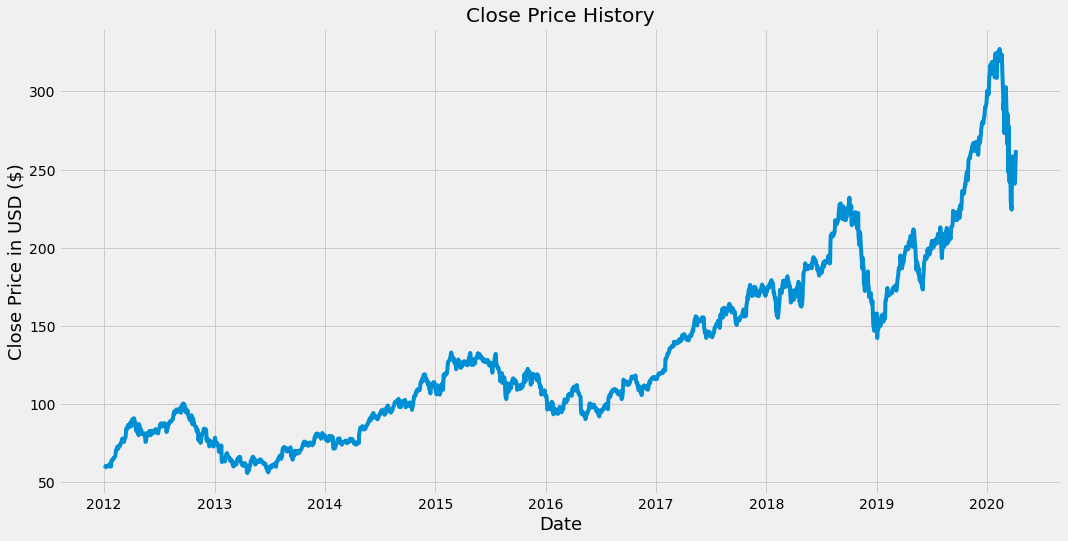

In [17]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD ($)', fontsize=18)
plt.show();

In [18]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8) #math.ceil to round it up

training_data_len

1663

In [19]:
#Scale the data (to apply preprocessing transformation is good practice)
#Scaling the data values to be between 0 and 1 (min 0 max 1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.6968792 ],
       [0.68390993],
       [0.7615047 ]])

In [20]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = [] # independent training variables
y_train = [] # dependent training variables

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) #from position 0 to position 59, containing the past 60 values
  y_train.append(train_data[i, 0]) #from position 61, the one that we want our model to predict
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]



In [0]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
#Reshape the data (LSDM network expects the input to be 3-dimensional in the form of samples
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1603, 60, 1)

In [23]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
#Fit is another name for train
model.fit(x_train, y_train, batch_size=1, epochs=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
1603/1603 [==============================] - 113s 70ms/step - loss: 6.6391e-04


In [0]:
#Create the testing data set
#Create a new array containing sclaed values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

#Create the data
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data (From 2D to 3D)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [33]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

9.673804970947334

ERROR! Session/line number was not unique in database. History logging moved to new session 62


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


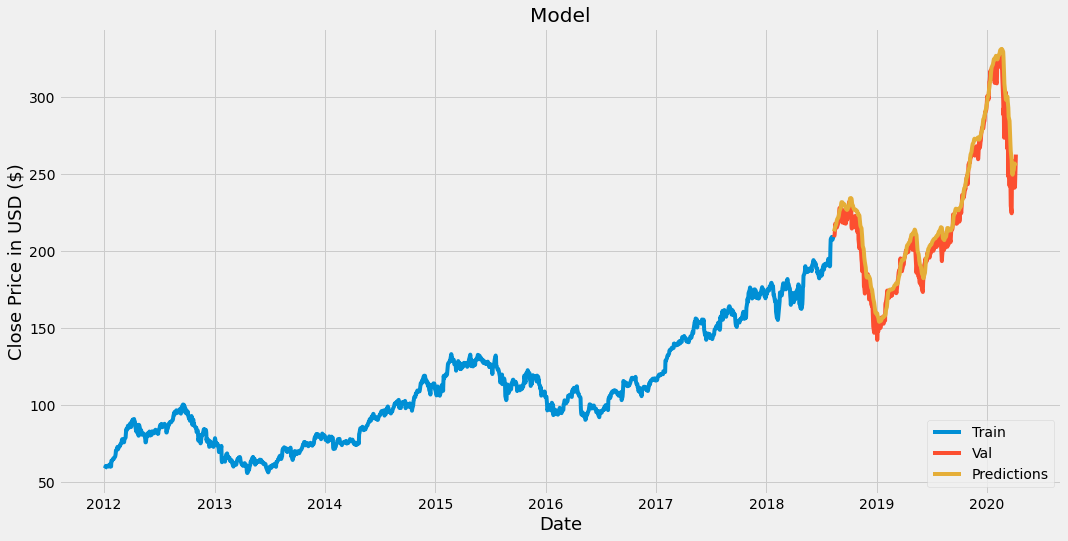

In [34]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [35]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-13,208.869995,212.636688
2018-08-14,209.750000,213.404495
2018-08-15,210.240005,214.092590
2018-08-16,213.320007,214.719772
2018-08-17,217.580002,215.635178
...,...,...
2020-03-31,254.289993,254.649277
2020-04-01,240.910004,256.670715
2020-04-02,244.929993,256.671631


In [50]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-04-07')

#Create a new data frame
new_df = apple_quote.filter(['Close'])

#Get the last 60 day closing price values and convert the data frame to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
predicted_price = model.predict(X_test)

#Undo the scaling
predicted_price = scaler.inverse_transform(predicted_price)

print(predicted_price) #Predicted value for April 8 2020

[[256.65048]]


In [42]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-04-07', end='2020-04-07')
print(apple_quote2['Close'])

Date
2020-04-06    262.470001
Name: Close, dtype: float64
